# Amazon Sentimental Analysis
## Importing important packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Getting the Data

In [3]:
amazon = pd.read_csv('amazon_reviews.csv')
amazon.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
amazon.info()
# Does not seem to be any null values, but we should check in case.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [5]:
amazon.describe()
# Rating is from 1-5, 1 indicating bad review and 5 indicating good review. Feedback is either 1 or 0, saying if the feedback was positive(1) or negative(0)

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


In [6]:
amazon.isna().sum()
# No null values in our data

rating              0
date                0
variation           0
verified_reviews    0
feedback            0
dtype: int64

I want to see if data and variation has anything to do with our sentimental analysis. I, personally, dont think it has any uses for sentimental analysis, but can be extremely useful for potential classification problems.

In [9]:
amazon['date'].value_counts()

30-Jul-18    1603
29-Jul-18     482
28-Jul-18     250
26-Jul-18      85
31-Jul-18      81
             ... 
2-Jun-18        2
9-Jun-18        1
29-May-18       1
4-Jun-18        1
13-Jun-18       1
Name: date, Length: 77, dtype: int64

In [10]:
amazon['variation'].value_counts()


Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
White                            91
Sandstone Fabric                 90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: variation, dtype: int64

We won't be using variation and date for our sentimental analysis.
## EDA

<AxesSubplot: xlabel='rating', ylabel='count'>

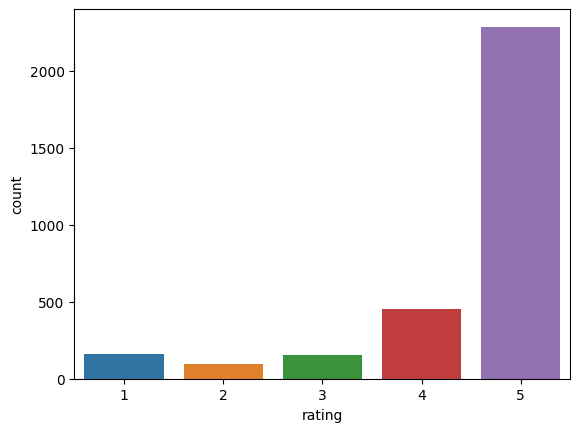

In [11]:
sns.countplot(x=amazon['rating'])

In [13]:
amazon['length'] = amazon['verified_reviews'].apply(len)

In [14]:
amazon

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


<AxesSubplot: ylabel='Frequency'>

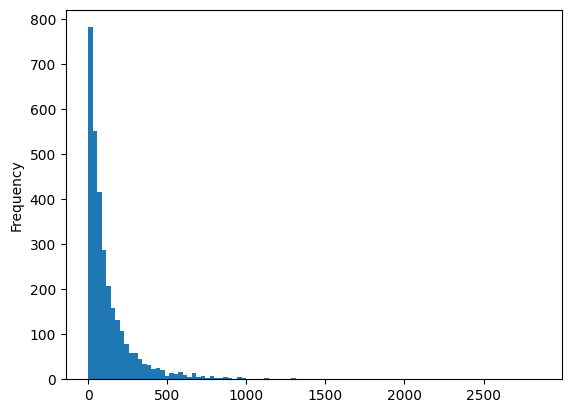

In [16]:
amazon['length'].plot(bins=100, kind='hist')

<AxesSubplot: xlabel='feedback', ylabel='count'>

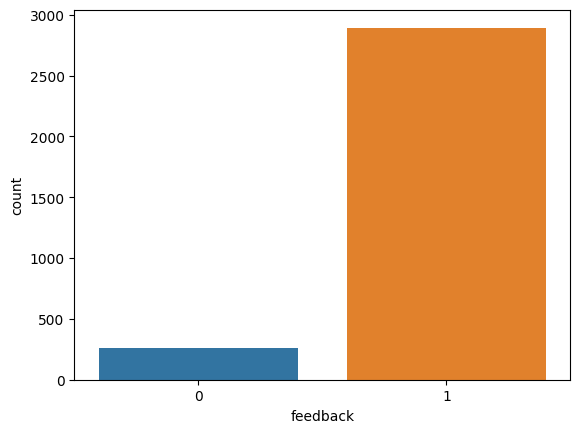

In [17]:
sns.countplot(x=amazon['feedback'])
# A lot more feedbacks compared to no feedbacks. Raises the question of vertified review column for those with no feedback.

## Word Cloud

In [19]:
positive = amazon[amazon['feedback'] == 1]
negative = amazon[amazon['feedback'] == 0]


In [22]:
post_sent = positive['verified_reviews'].tolist()
neg_sent = negative['verified_reviews'].tolist()


In [24]:
post_sent = ''.join(post_sent)
neg_sent = ''.join(neg_sent)

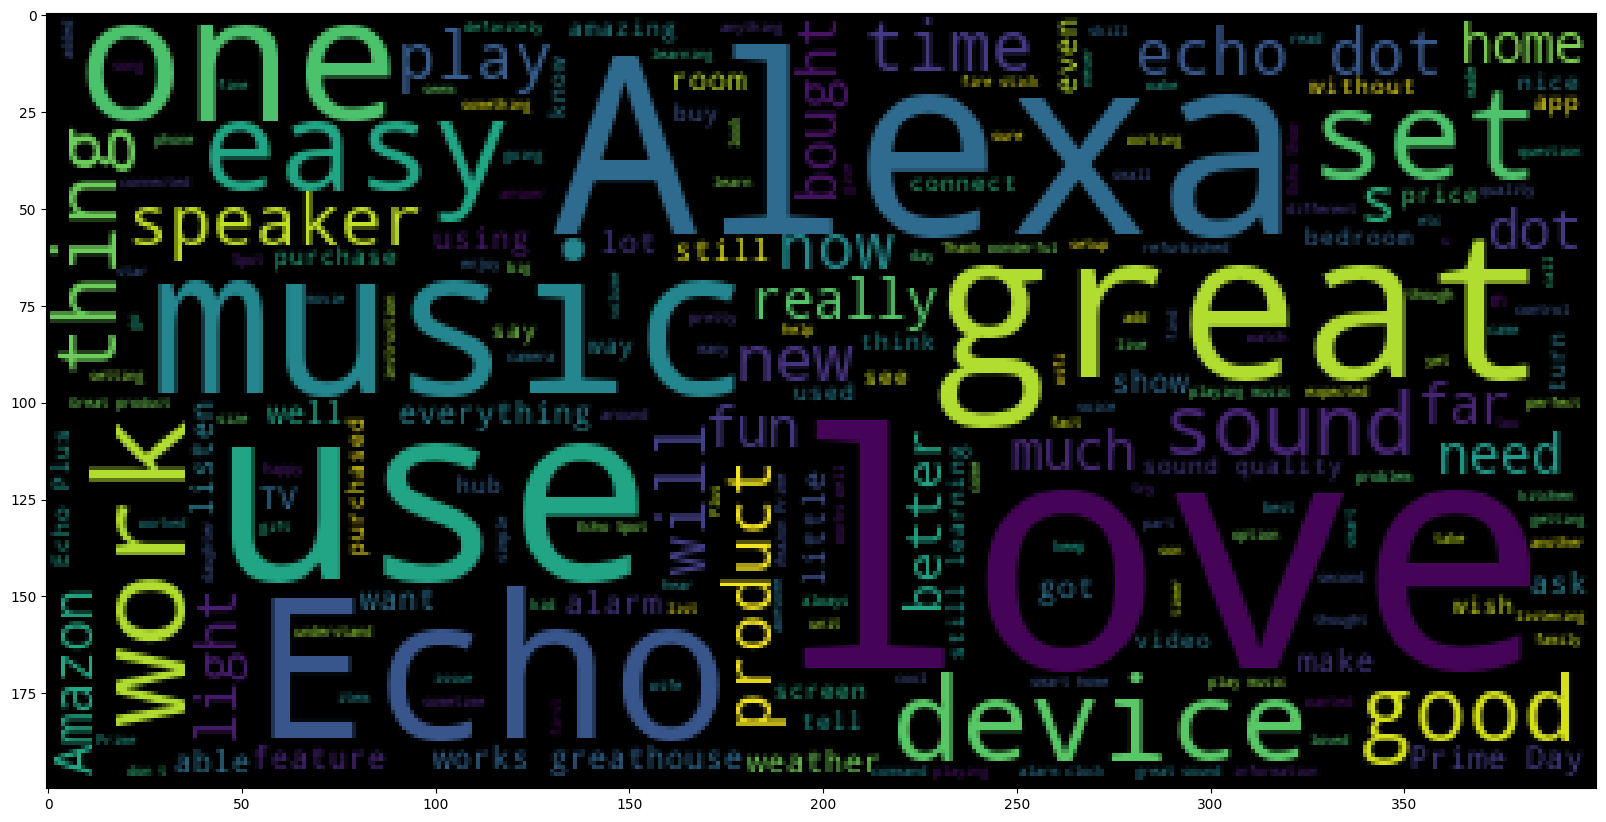

In [25]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(post_sent))

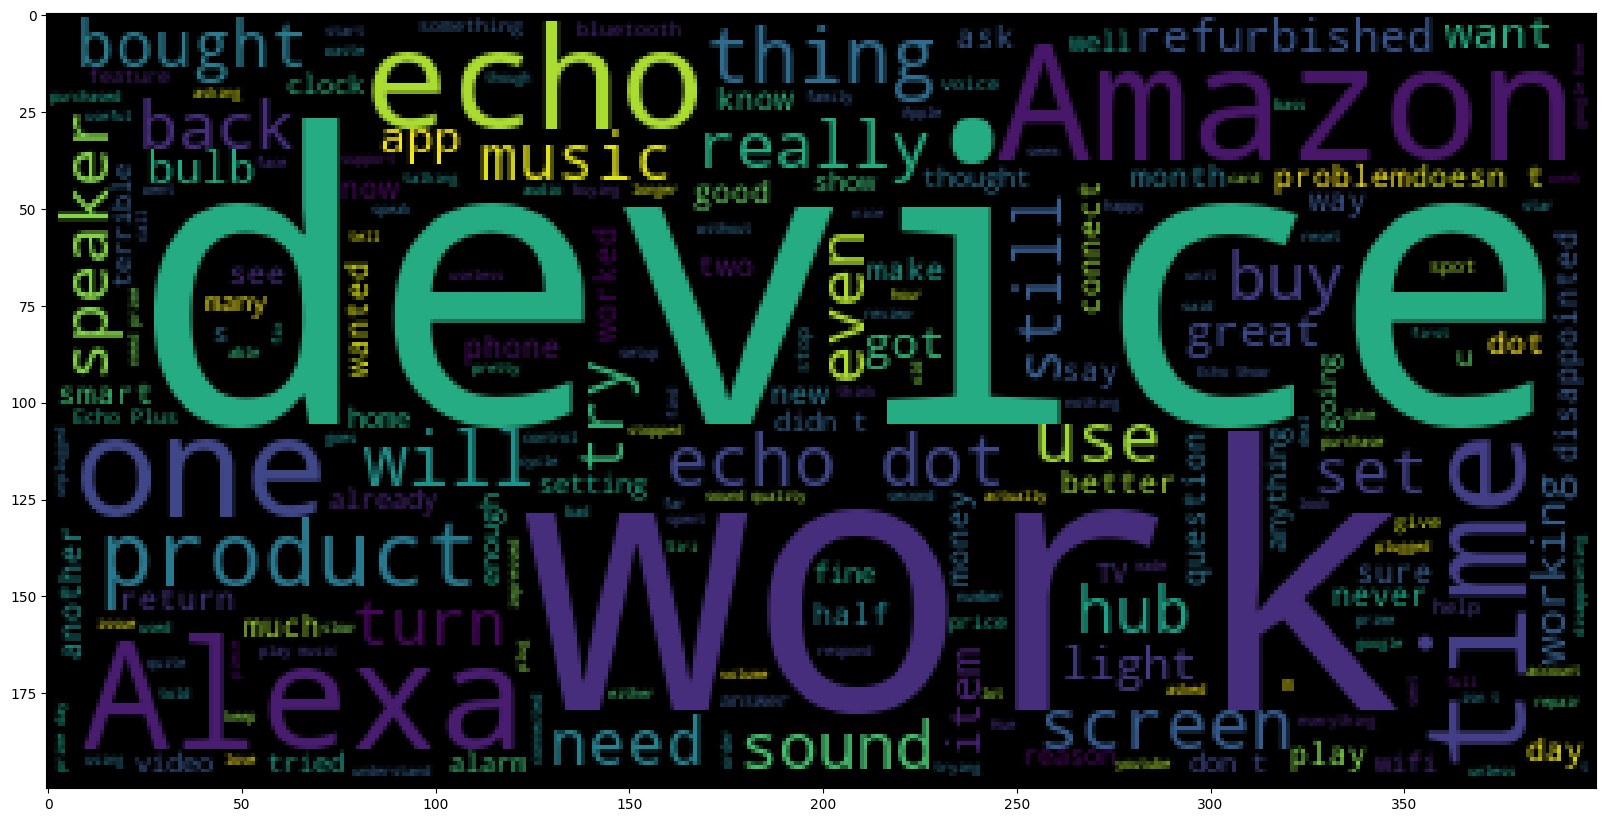

In [26]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_sent))

## Cleaning of sentences and tokenization

In [27]:
# Cleaning the sentences
import string
string.punctuation
import nltk  
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\myron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
amazon_cleaned = amazon['verified_reviews'].apply(message_cleaning)

In [30]:
amazon.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [31]:
amazon_cleaned.head()

0                                         [Love, Echo]
1                                              [Loved]
2    [Sometimes, playing, game, answer, question, c...
3    [lot, fun, thing, 4, yr, old, learns, dinosaur...
4                                              [Music]
Name: verified_reviews, dtype: object

In [32]:
# Tokenization
from sklearn.feature_extraction.text import CountVectorizer
# We can apply the message cleaning pipeline into our CountVectorizer
vectorizer = CountVectorizer(analyzer=message_cleaning)
amazon_vectorized = vectorizer.fit_transform(amazon['verified_reviews'])

In [33]:
amazon_vectorized.shape

(3150, 5211)

In [38]:
print(vectorizer.get_feature_names_out())

['072318' '1' '10' ... '😬' '😳' '🤓']


In [39]:
print(amazon_vectorized.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [42]:
reviews = pd.DataFrame(amazon_vectorized.toarray())

In [43]:
X = reviews

In [44]:
y = amazon['feedback']

## Training and Testing Different Models

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [49]:
from sklearn.naive_bayes import MultinomialNB

NB_Classifier = MultinomialNB()
NB_Classifier.fit(X_train, y_train)

MultinomialNB()

              precision    recall  f1-score   support

           0       0.79      0.20      0.31        56
           1       0.93      0.99      0.96       574

    accuracy                           0.92       630
   macro avg       0.86      0.60      0.64       630
weighted avg       0.91      0.92      0.90       630



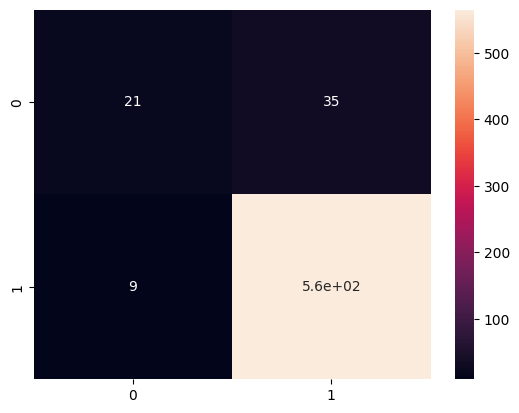

In [60]:
from sklearn.metrics import classification_report, confusion_matrix

y_predict_test = NB_Classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_pred))

In [57]:
from sklearn.linear_model import LogisticRegression

              precision    recall  f1-score   support

           0       0.79      0.34      0.47        56
           1       0.94      0.99      0.96       574

    accuracy                           0.93       630
   macro avg       0.87      0.67      0.72       630
weighted avg       0.93      0.93      0.92       630



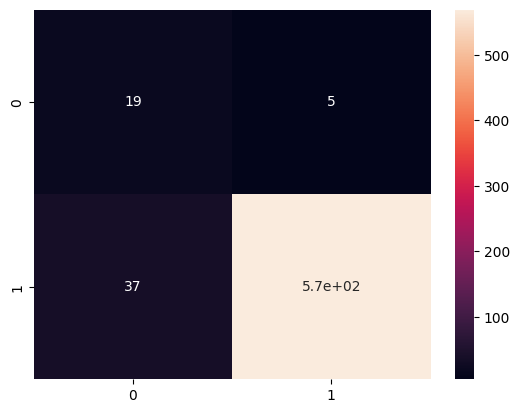

In [58]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.20      0.31        56
           1       0.93      0.99      0.96       574

    accuracy                           0.92       630
   macro avg       0.86      0.60      0.64       630
weighted avg       0.91      0.92      0.90       630



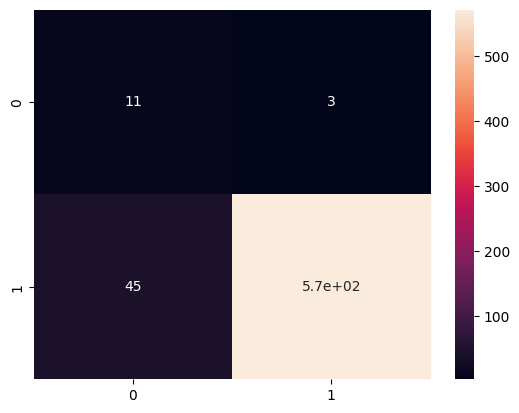

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

## Conclusion 
As we can see, the performance of our model is extremely similar to each other. Utlizing any of these models are perfectly fine for educational purposes. Although it may seem that performance is good in testing, it would still need to be tested in deployment, which may perform extremely poorly. In our dataset, there is an imbalance between negative reviews and positive reviews as shown in our EDA. This imbalance will cause trouble in deployment due to our dataset being heavily positive. To fix this, more data is needed for data balancing.

Overall, this project taught me a lot about sentimental analysis and the uses of it in real life situations. Although not done in our project, we can utilize the model to see what words makes a review positive and negative and use it to guide business decisions, such as how to improve our products and potential insights of our products.

Thank you for taking the time to look at my project and please comment on any improvements.